In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
projects = ["BRCA","Lung","Kidney","Brain","HNSC","CESC"]
model_types = ["expr","bulk","spatial","expr_spatial","bulk_spatial","exprsp", "bulksp"]
#model_types = ["expr", "bulk", "spatial", "expr_spatial", "bulk_spatial", "exprsp", "bulksp"]
#model_types = ["age_gender", "age_gender_expr", "age_gender_expr_spatial", "age_gender_exprsp"]

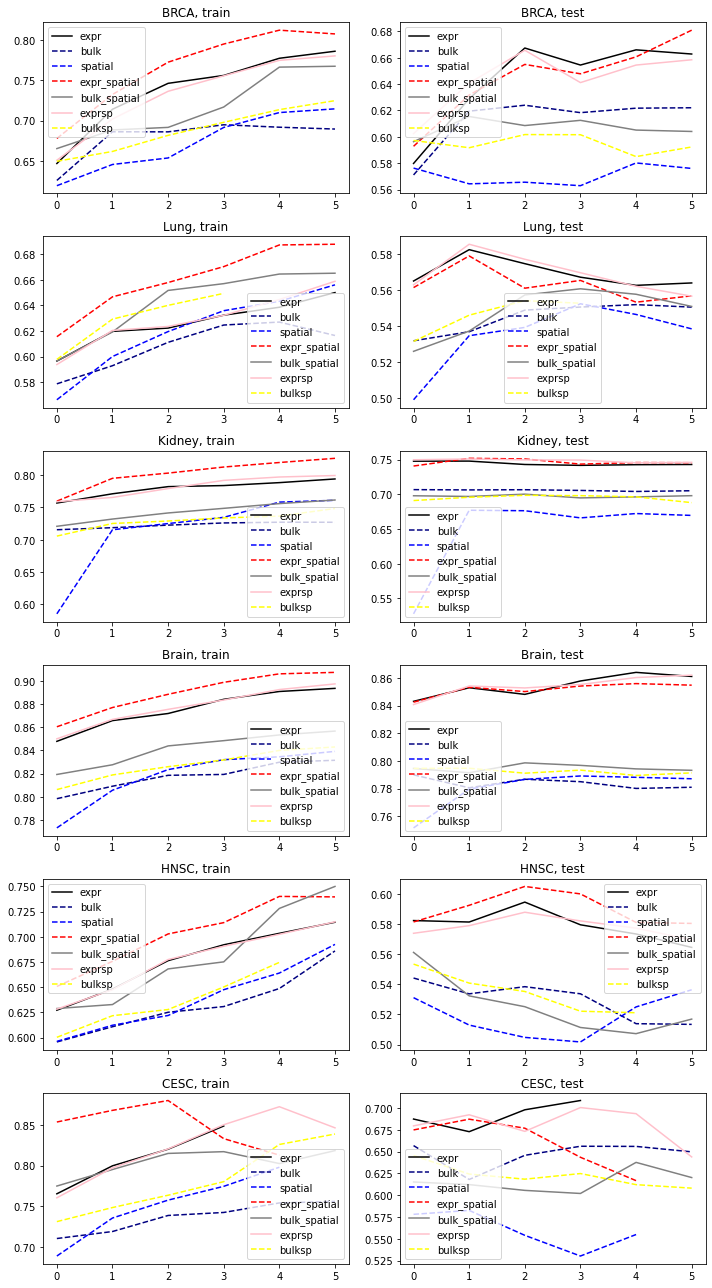

In [6]:
##----------------------
nx,ny = 2,len(projects)
fig, ax = plt.subplots(ny,nx,figsize=(nx*5,ny*3))

colors = ["black", "navy", "blue", "red", "grey", "pink", "yellow"]
linestyles = ["-", "--", "--", "--", "-", "-", "--"]
for i,project in enumerate(projects):
    for j,model_type in enumerate(model_types):
        
        ci = np.loadtxt("analysis_results/%s_%s.txt"%(project,model_type))

        ax[i,0].plot(ci[:,2], color=colors[j],linestyle=linestyles[j],label="%s"%model_type)        
        ax[i,1].plot(ci[:,5], color=colors[j],linestyle=linestyles[j],label="%s"%model_type) 

        #ax[i].axhline(y=0.5,color='r',linestyle='--')
        #ax[i,j].set_title("%s, %s"%(project,model_type))

        #ax[i].set_xlabel("#features")
        #ax[i].set_ylabel("C-index")
        ax[i,0].legend()
        ax[i,1].legend()

    ax[i,0].set_title("%s, train"%project)
    ax[i,1].set_title("%s, test"%project)

plt.tight_layout(h_pad=1, w_pad= 1.5)
plt.savefig("ci_compare.pdf", format='pdf', dpi=50)